In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly) 

In [5]:
Auto = load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
y = Auto['mpg']
X = MS(['horsepower']).fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [7]:
newX = pd.DataFrame({'horsepower': [98]})
newX = MS(['horsepower']).fit_transform(newX)
newX

,intercept,horsepower
0,1.0,98


In [8]:
new_prediction = results.get_prediction(newX)
new_prediction.predicted_mean

array([24.46707715])

In [9]:
new_prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [10]:
new_prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

In [11]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

In [12]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

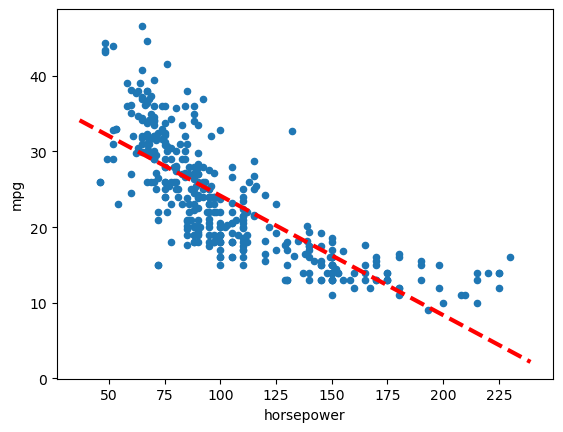

In [13]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, results.params.iloc[0], results.params.iloc[1], 'r--', linewidth=3)

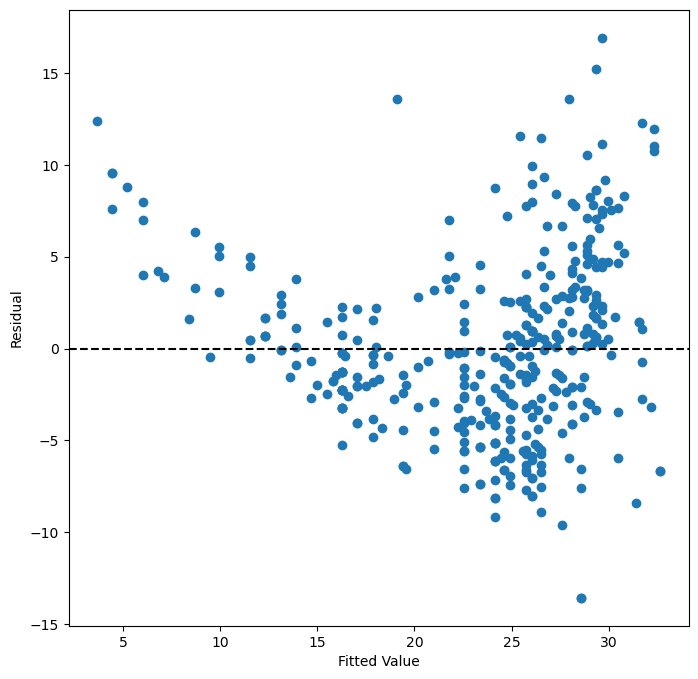

In [14]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

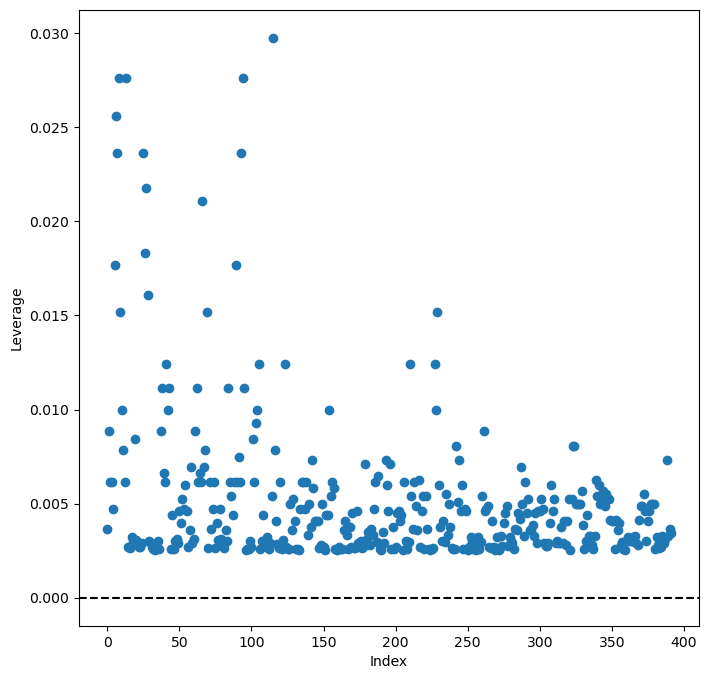

In [15]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.axhline(0, c='k', ls='--')
np.argmax(infl.hat_matrix_diag)

115

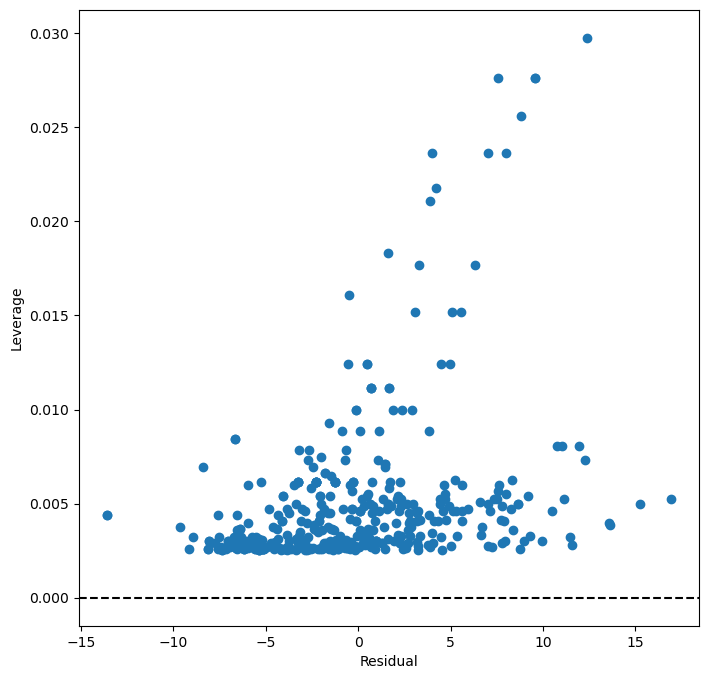

In [16]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.resid, infl.hat_matrix_diag)
ax.set_xlabel('Residual')
ax.set_ylabel('Leverage')
ax.axhline(0, c='k', ls='--')
np.argmax(infl.hat_matrix_diag)

In [17]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

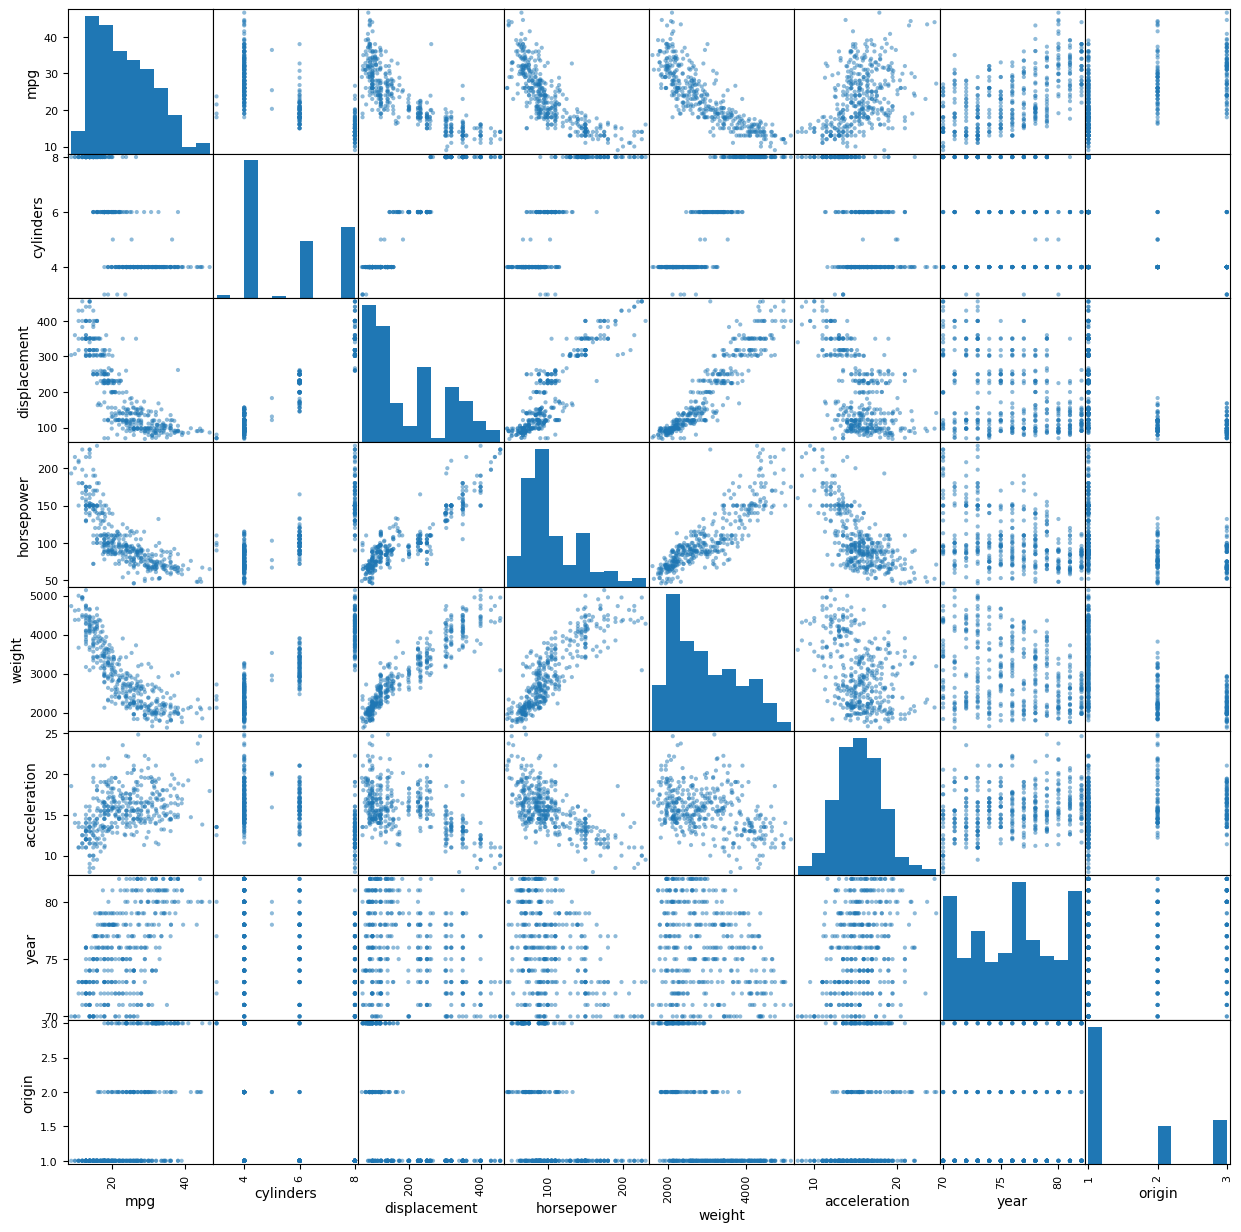

In [18]:
pd.plotting.scatter_matrix(Auto, figsize=(15,15));

In [19]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [20]:
terms = Auto.columns.drop('mpg')
X = MS(terms).fit_transform(Auto)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [21]:
anova_lm(results, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


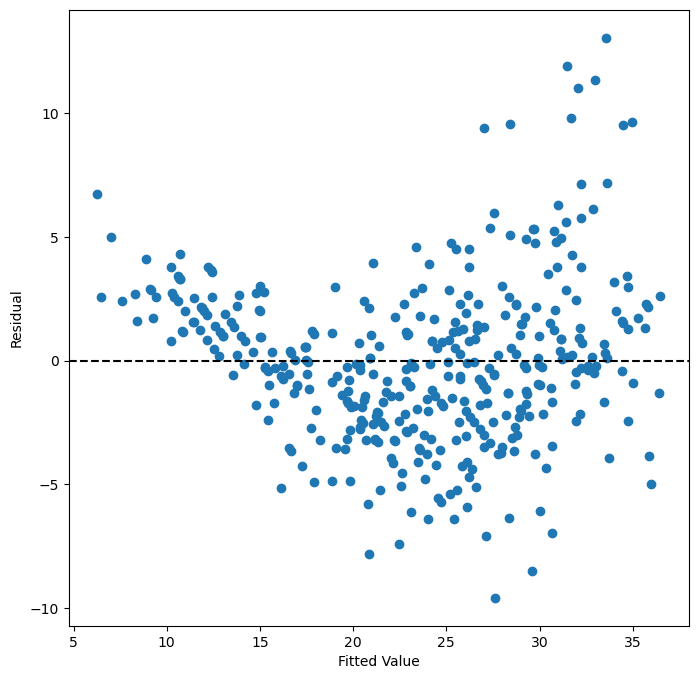

In [22]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues, results1.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

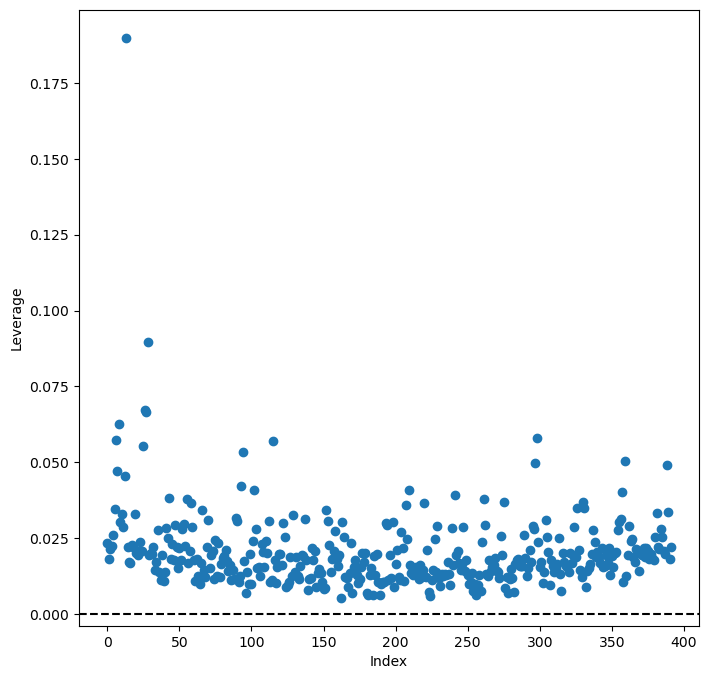

In [23]:
infl = results1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.axhline(0, c='k', ls='--')
np.argmax(infl.hat_matrix_diag)

In [24]:
X = MS(['horsepower', 'year', ('horsepower', 'year')]).fit_transform(Auto)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,-126.6089,12.117,-10.449,0.0
horsepower,1.0457,0.115,9.063,0.0
year,2.1920,0.161,13.585,0.0
horsepower:year,-0.0160,0.002,-10.217,0.0


In [25]:
X = MS(['horsepower', 'year', 'acceleration', 'weight', ('horsepower', 'year'), ('acceleration', 'weight')]).fit_transform(Auto)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,-107.1861,9.564000,-11.207,0.000
horsepower,0.6915,0.092000,7.510,0.000
year,1.7378,0.127000,13.699,0.000
acceleration,1.3033,0.227000,5.751,0.000
weight,0.0024,0.001000,1.793,0.074
horsepower:year,-0.0100,0.001000,-7.966,0.000
acceleration:weight,-0.0005,0.000076,-6.353,0.000


In [26]:
allvars = list(Auto.columns.drop('mpg'))
final = allvars + [('cylinders','displacement'),('year','origin')]
X = MS(final).fit_transform(Auto)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,25.0712,8.599,2.916,0.004
cylinders,-2.7408,0.403,-6.808,0.000
displacement,-0.0835,0.014,-5.964,0.000
horsepower,-0.0449,0.013,-3.411,0.001
weight,-0.0051,0.001,-8.258,0.000
acceleration,0.0716,0.090,0.793,0.428
year,0.4038,0.104,3.884,0.000
origin,-15.8891,4.347,-3.655,0.000
cylinders:displacement,0.0138,0.002,8.163,0.000
year:origin,0.2132,0.056,3.825,0.000


In [27]:
X = MS([poly('horsepower', degree=2), 'year']).fit_transform(Auto)
model3 = sm.OLS(y, X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,-29.2975,4.264,-6.871,0.0
"poly(horsepower, degree=2)[0]",-99.0845,4.079,-24.291,0.0
"poly(horsepower, degree=2)[1]",46.5061,3.713,12.525,0.0
year,0.6942,0.056,12.382,0.0


In [28]:
X = MS([poly('horsepower', degree=1), 'year']).fit_transform(Auto)
model3 = sm.OLS(y, X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,-26.4930,5.039,-5.257,0.0
"poly(horsepower, degree=1)",-100.2040,4.827,-20.761,0.0
year,0.6573,0.066,9.919,0.0


In [29]:
X = MS([poly('horsepower', degree=3), 'year']).fit_transform(Auto)
model3 = sm.OLS(y, X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,-29.4640,4.260,-6.916,0.000
"poly(horsepower, degree=3)[0]",-99.0181,4.074,-24.304,0.000
"poly(horsepower, degree=3)[1]",46.5137,3.708,12.543,0.000
"poly(horsepower, degree=3)[2]",-5.2257,3.705,-1.411,0.159
year,0.6964,0.056,12.432,0.000


In [30]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [31]:
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
y = Carseats['Sales']
model4 = sm.OLS(y, X)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [32]:
X = MS(['Price', 'US']).fit_transform(Carseats)
model5 = sm.OLS(y, X)
results5 = model5.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [33]:
anova_lm(results4, results5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


In [34]:
results5.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


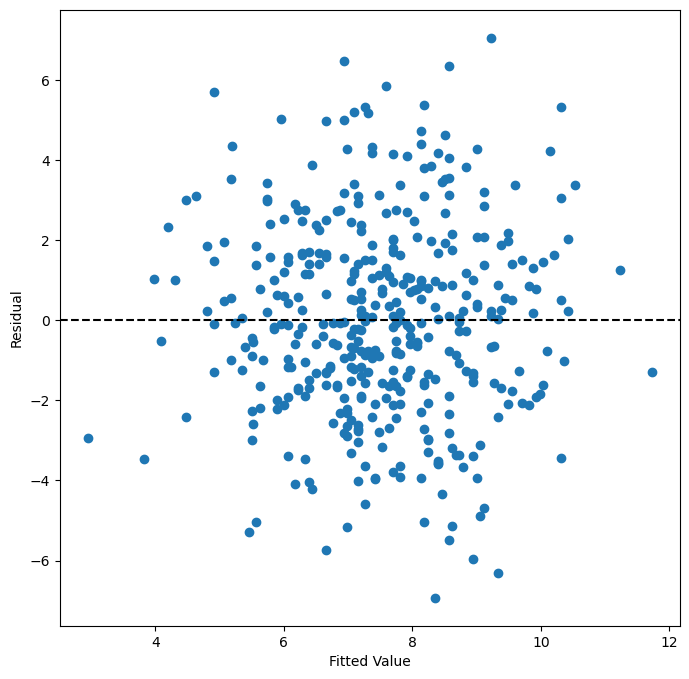

In [35]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results5.fittedvalues, results5.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

42

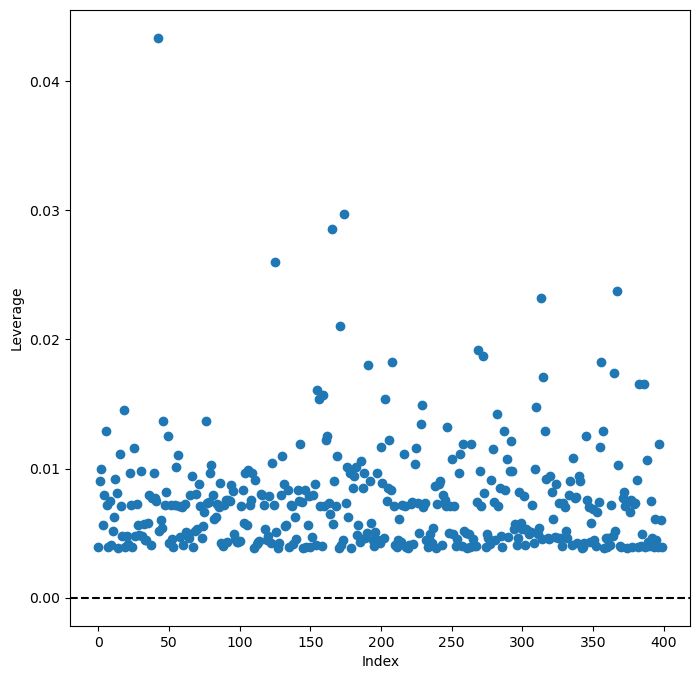

In [36]:
infl = results5.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.axhline(0, c='k', ls='--')
np.argmax(infl.hat_matrix_diag)

In [37]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [38]:
df = pd.DataFrame({'x': x, 'y': y})
X = MS(['x'],intercept=False).fit_transform(df)
y = df['y']
model6 = sm.OLS(y, X)
results6 = model6.fit()
summarize(results6)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


In [39]:
model6 = sm.OLS(X, y)
results6 = model6.fit()
summarize(results6)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


In [40]:
# Generate n = 100 observations
n = 100

# Generate X and Y with different variances
X = rng.normal(0, 1, n)
Y = 2 * X + rng.normal(0, 5, n)  # Y has a larger variance due to the noise

# Regression of Y onto X
model_Y_on_X = sm.OLS(Y, X).fit()
beta_Y_on_X = model_Y_on_X.params[0]

# Regression of X onto Y
model_X_on_Y = sm.OLS(X, Y).fit()
beta_X_on_Y = model_X_on_Y.params[0]

beta_Y_on_X, beta_X_on_Y

(2.47918599468763, 0.08848036588824504)

In [41]:
# Generate n = 100 observations
n = 100

# Generate X and Y with the same variance
X = rng.normal(0, 1, n)
Y = 2 * X + rng.normal(0, 1, n)  # Same variance as X

# Regression of Y onto X
model_Y_on_X = sm.OLS(Y, X).fit()
beta_Y_on_X = model_Y_on_X.params[0]

# Regression of X onto Y
model_X_on_Y = sm.OLS(X, Y).fit()
beta_X_on_Y = model_X_on_Y.params[0]

beta_Y_on_X, beta_X_on_Y

(1.9079241133906928, 0.3728051181898856)

In [42]:
rng = np.random.default_rng(1)

n = 100

X = rng.normal(0, 1, n)
eps = rng.normal(0, np.sqrt(0.25), n)

y = -1 + 0.5 * X + eps
y[:10]

array([-1.15284841, -0.15796853, -0.8975775 , -1.317002  ,  0.06209974,
       -0.58534792, -1.70633719, -1.46660026,  0.05897826, -0.90857985])

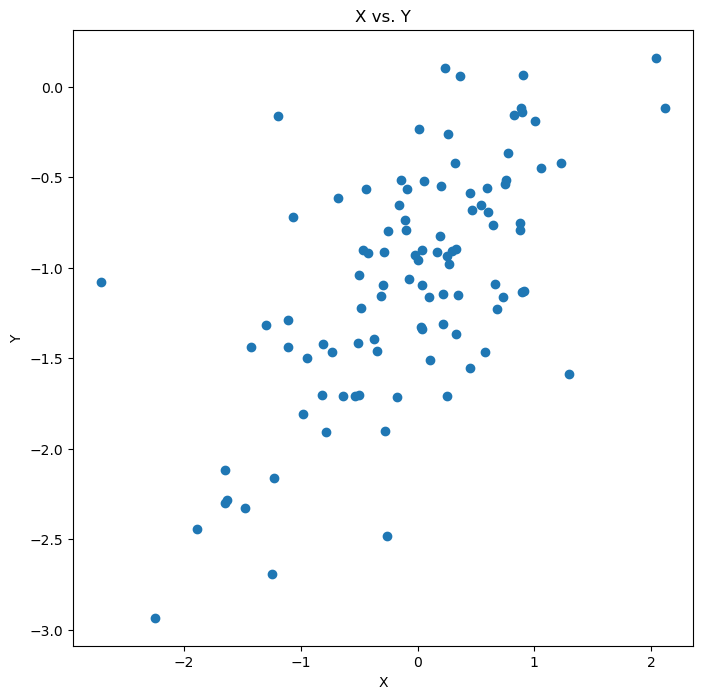

In [43]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(X, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y');

In [44]:
df = pd.DataFrame({'x': X, 'y': y})
X = MS(['x']).fit_transform(df)
y = df['y']
model_0 = sm.OLS(y, X)
results_0 = model_0.fit()
summarize(results_0)

,coef,std err,t,P>|t|
intercept,-1.0380,0.050,-20.647,0.0
x,0.4843,0.059,8.233,0.0


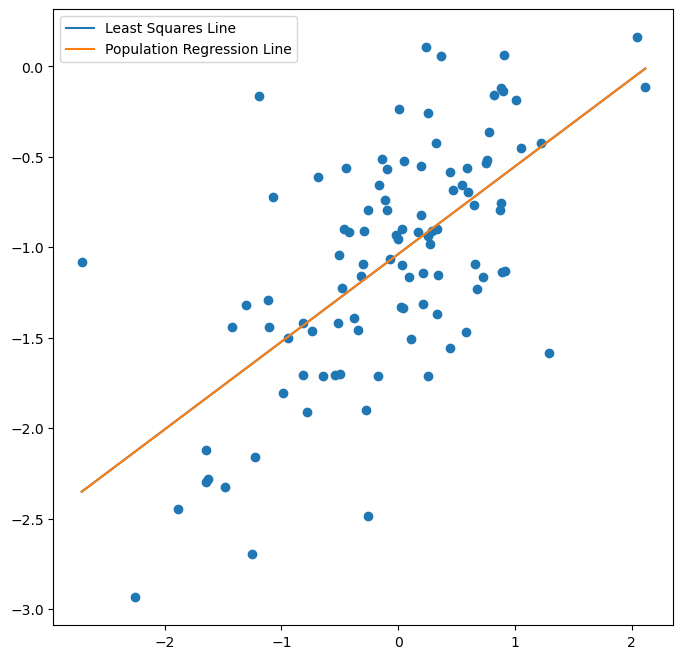

In [45]:
slope = results_0.params['x']
intercept = results_0.params['intercept']

# Generate x-values for the regression line
x_line = np.linspace(min(X['x']), max(X['x']), 100)

# Calculate y-values for the regression line
y_line = intercept + slope * x_line

ax = subplots(figsize=(8,8))[1]
ax.scatter(X['x'], y)

# Plot the least squares line
ax.plot(x_line, y_line, label='Least Squares Line')

true_slope = slope
true_intercept = intercept
y_pop = true_intercept + true_slope * x_line
ax.plot(x_line, y_pop, label='Population Regression Line')

ax.legend();

In [46]:
X = MS([poly('x', degree=2)]).fit_transform(df)
y = df['y']
model_1 = sm.OLS(y, X)
results_1 = model_1.fit()
summarize(results_1)

,coef,std err,t,P>|t|
intercept,-1.0737,0.050,-21.326,0.000
"poly(x, degree=2)[0]",4.1240,0.503,8.191,0.000
"poly(x, degree=2)[1]",-0.0261,0.503,-0.052,0.959


In [47]:
n = 100

X = rng.normal(0, 1, n)
eps = rng.normal(0, np.sqrt(0.2), n)

y = -1 + 0.5 * X + eps
y[:10]

array([-0.35088171, -0.06055004, -1.74762061, -1.12730352, -1.27484914,
       -1.14188724, -0.98933466, -0.06633707, -1.33973192, -0.72228478])

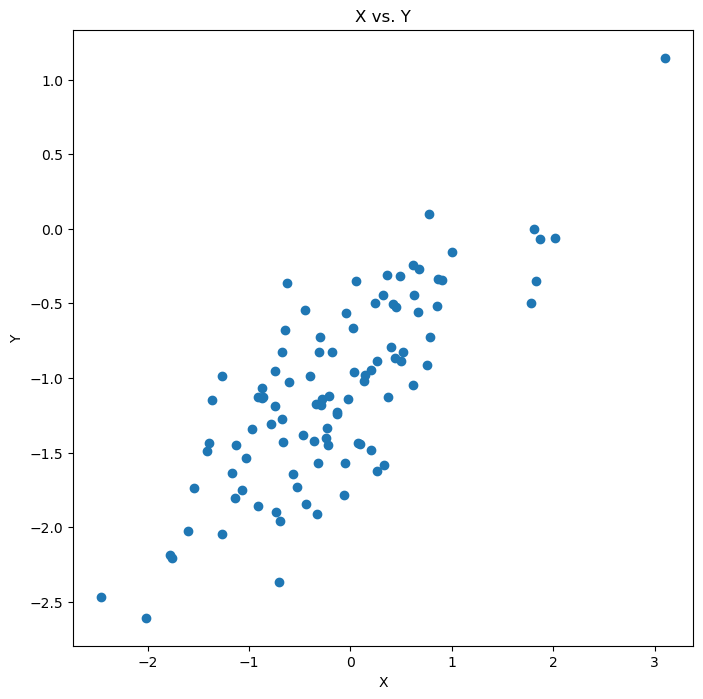

In [48]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(X, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y');

In [49]:
df = pd.DataFrame({'x': X, 'y': y})
X = MS(['x']).fit_transform(df)
y = df['y']
model_0 = sm.OLS(y, X)
results_0 = model_0.fit()
summarize(results_0)

,coef,std err,t,P>|t|
intercept,-1.0021,0.040,-25.189,0.0
x,0.5425,0.043,12.643,0.0


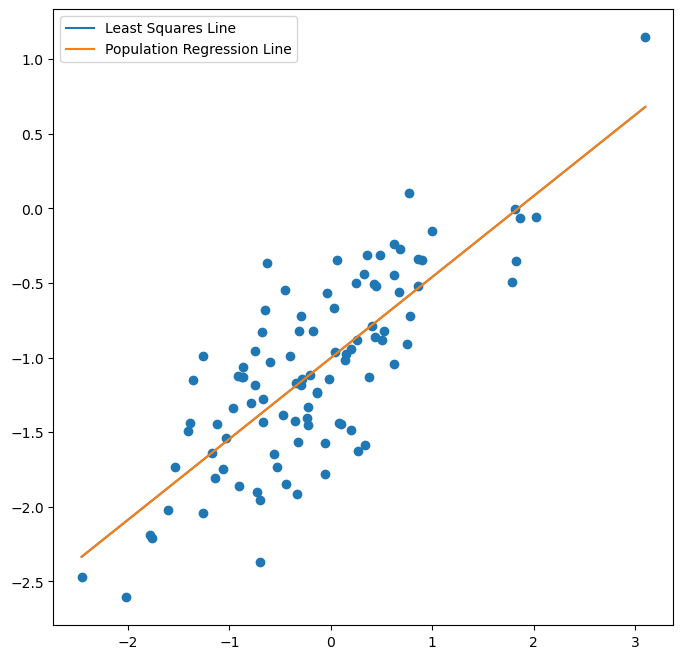

In [50]:
slope = results_0.params['x']
intercept = results_0.params['intercept']

# Generate x-values for the regression line
x_line = np.linspace(min(X['x']), max(X['x']), 100)

# Calculate y-values for the regression line
y_line = intercept + slope * x_line

ax = subplots(figsize=(8,8))[1]
ax.scatter(X['x'], y)

# Plot the least squares line
ax.plot(x_line, y_line, label='Least Squares Line')

true_slope = slope
true_intercept = intercept
y_pop = true_intercept + true_slope * x_line
ax.plot(x_line, y_pop, label='Population Regression Line')

ax.legend();

In [51]:
X = MS([poly('x', degree=2)]).fit_transform(df)
y = df['y']
model_1 = sm.OLS(y, X)
results_1 = model_1.fit()
summarize(results_1)

,coef,std err,t,P>|t|
intercept,-1.0894,0.039,-27.673,0.000
"poly(x, degree=2)[0]",4.9533,0.394,12.582,0.000
"poly(x, degree=2)[1]",0.0962,0.394,0.244,0.807


In [52]:
n = 100

X = rng.normal(0, 1, n)
eps = rng.normal(0, np.sqrt(0.75), n)

y = -1 + 0.5 * X + eps
y[:10]

array([-2.87323293,  0.60821666, -2.43914464, -0.93940521, -2.83956999,
        0.24292185, -1.29804241, -0.23206378,  0.09970269, -1.27648767])

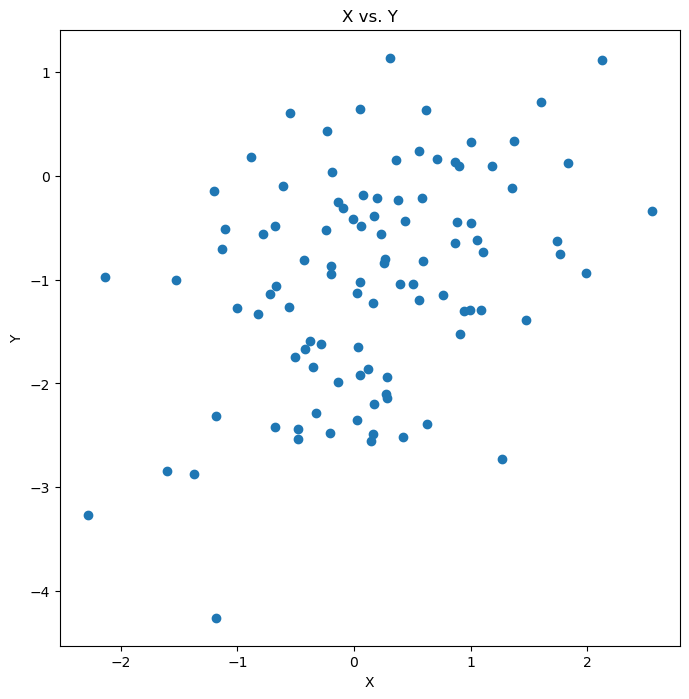

In [53]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(X, y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs. Y');

In [54]:
df = pd.DataFrame({'x': X, 'y': y})
X = MS(['x']).fit_transform(df)
y = df['y']
model_0 = sm.OLS(y, X)
results_0 = model_0.fit()
summarize(results_0)

,coef,std err,t,P>|t|
intercept,-1.0630,0.098,-10.822,0.0
x,0.4316,0.108,4.012,0.0


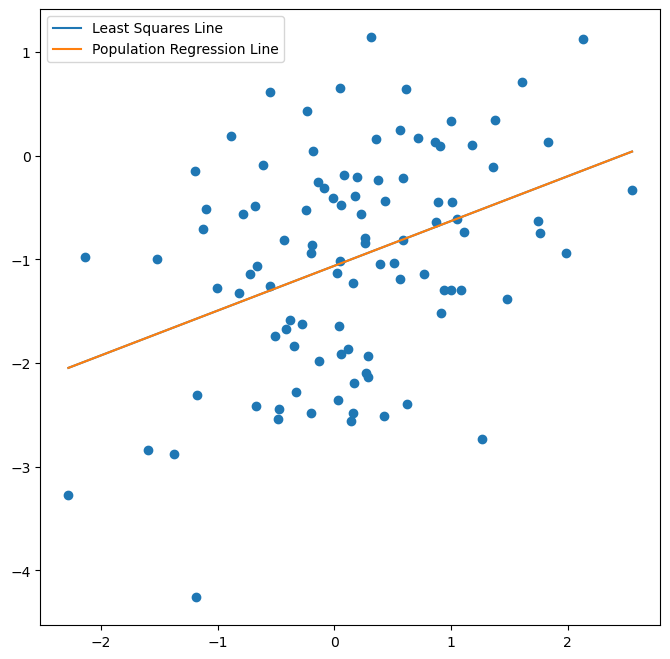

In [55]:
slope = results_0.params['x']
intercept = results_0.params['intercept']

# Generate x-values for the regression line
x_line = np.linspace(min(X['x']), max(X['x']), 100)

# Calculate y-values for the regression line
y_line = intercept + slope * x_line

ax = subplots(figsize=(8,8))[1]
ax.scatter(X['x'], y)

# Plot the least squares line
ax.plot(x_line, y_line, label='Least Squares Line')

true_slope = slope
true_intercept = intercept
y_pop = true_intercept + true_slope * x_line
ax.plot(x_line, y_pop, label='Population Regression Line')

ax.legend();

In [56]:
X = MS([poly('x', degree=2)]).fit_transform(df)
y = df['y']
model_1 = sm.OLS(y, X)
results_1 = model_1.fit()
summarize(results_1)

,coef,std err,t,P>|t|
intercept,-0.9984,0.097,-10.255,0.000
"poly(x, degree=2)[0]",3.8876,0.974,3.993,0.000
"poly(x, degree=2)[1]",-0.2845,0.974,-0.292,0.771


In [117]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

0.772324497691354

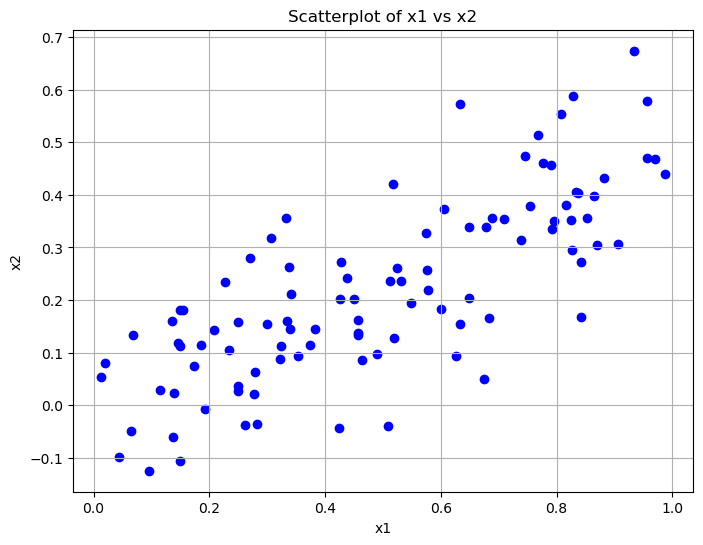

In [121]:
# Calculating the correlation between x1 and x2
correlation = np.corrcoef(x1, x2)[0,1]

# Creating a scatterplot to display the relationship between x1 and x2
ax = subplots(figsize=(8, 6))[1]
ax.scatter(x1, x2, color='blue')
ax.set_title('Scatterplot of x1 vs x2')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.grid(True)
correlation

In [123]:
df = pd.DataFrame({'x1': x, 'x2': x2, 'y': y})
y = df['y']
X = MS(['x1', 'x2']).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.3248,0.155,15.024,0.000
x1,0.0101,0.112,0.091,0.928
x2,2.9097,0.553,5.263,0.000


In [127]:
beta_hat_0, beta_hat_1, beta_hat_2 = results.params
summary = results.summary()

beta_hat_0, beta_hat_1, beta_hat_2, summary

(2.324765323352293,
 0.010114760234182965,
 2.9097295872964084,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.222
 Model:                            OLS   Adj. R-squared:                  0.206
 Method:                 Least Squares   F-statistic:                     13.86
 Date:                Mon, 26 Aug 2024   Prob (F-statistic):           5.08e-06
 Time:                        12:52:16   Log-Likelihood:                -135.24
 No. Observations:                 100   AIC:                             276.5
 Df Residuals:                      97   BIC:                             284.3
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----

In [129]:
X = MS(['x1']).fit_transform(df)
model1 = sm.OLS(y, X)
results2 = model1.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,2.9661,0.108,27.578,0.000
x1,0.0171,0.126,0.136,0.892


In [131]:
X = MS(['x2']).fit_transform(df)
model2 = sm.OLS(y, X)
results3 = model2.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


In [133]:
anova_lm(results, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,97.0,87.533297,0.0,NaN,NaN,NaN
1,98.0,87.540715,-1.0,-0.007418,0.008304,NaN


In [135]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
X = MS(['x1', 'x2']).fit_transform(df)
y = df['y']
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [137]:
X = MS(['x1']).fit_transform(df)
model4 = sm.OLS(y, X)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


In [139]:
X = MS(['x2']).fit_transform(df)
model5 = sm.OLS(y, X)
results5 = model5.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


In [141]:
anova_lm(results3, results5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,86.185210,0.0,NaN,NaN,NaN
1,99.0,89.157206,-1.0,-2.971996,3.300099,NaN


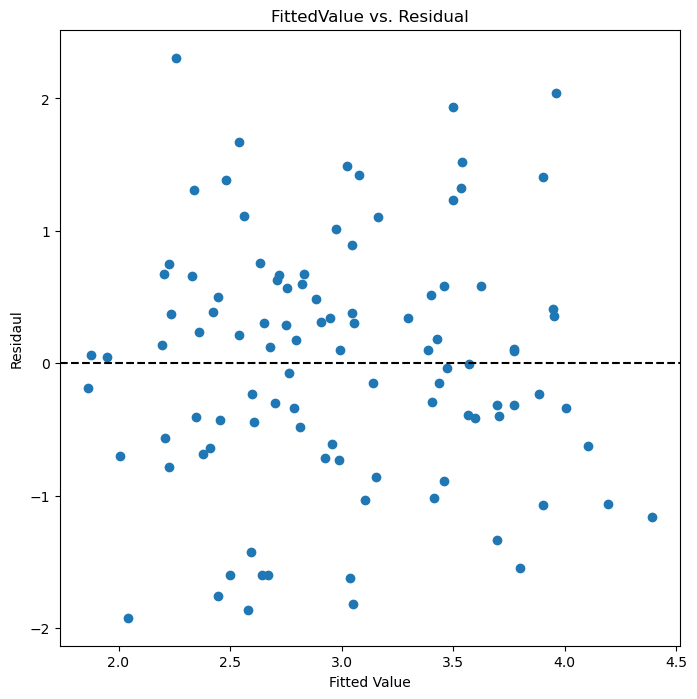

In [143]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residaul')
ax.set_title('FittedValue vs. Residual')
ax.axhline(0, c='k', ls='--');

100

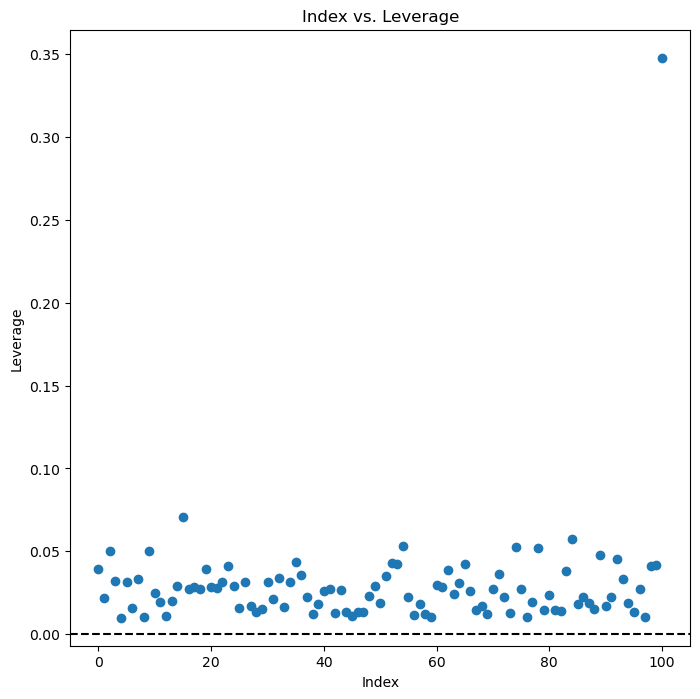

In [147]:
infl = results3.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.set_title('Index vs. Leverage')
ax.axhline(0, c='k', ls='--')
np.argmax(infl.hat_matrix_diag)

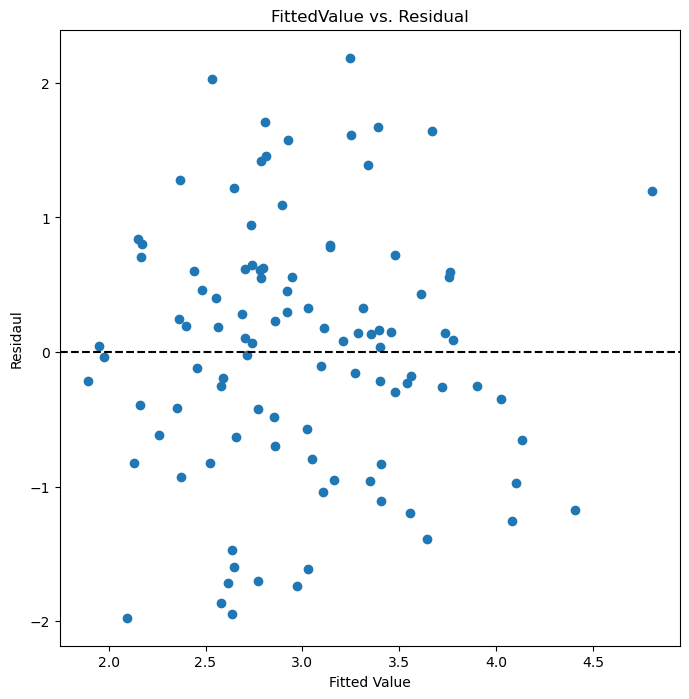

In [149]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results5.fittedvalues, results5.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residaul')
ax.set_title('FittedValue vs. Residual')
ax.axhline(0, c='k', ls='--');

100

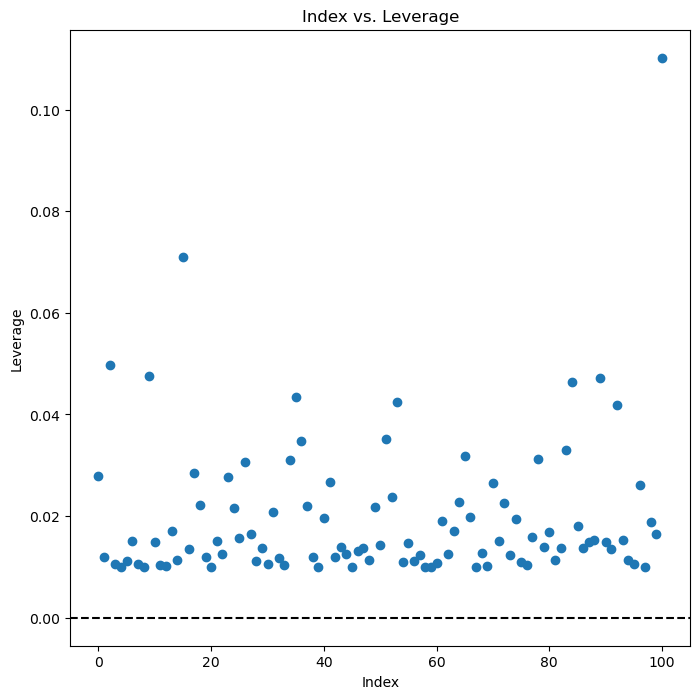

In [151]:
infl = results5.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.set_title('Index vs. Leverage')
ax.axhline(0, c='k', ls='--')
np.argmax(infl.hat_matrix_diag)